# Titanic Survival Exploration with Decision Trees
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#ask">Asking Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#pred">Decision Trees</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Business Understanding

These are data about 891 passengers who were on the Titanic ship. 

The objective of the analysis: Investigation of What factors are important and affected the passenger's Survive.

### Features :
- these are the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

sns.set()

<a id='ask'></a>
## 1- Asking Questions

Q1 Is there any Correlation between features and Survived?

Q2 Are gender ,Pclass , and Embarked affect the passenger's Survived?

Q3 Is Number of siblings and spouses of the passenger aboard affect the passenger's Survived?

Q4 Is  Number of parents and children of the passenger aboard affect the passenger's Survived?

Q5 Is Fare paid by the passenger affect the Surviving?

Q6 Is the average of age of passenger's affect the Surviving?

<a id='wrangling'></a>
## 2- Data Wranging

### a) Gathering Data

In [2]:
df=pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### b) Assess Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- remove PassengerId and Name from dataset
- Age has some null values and it represents 20% of dataset so we can fill it with mean
- remove Ticket feature , it has 681 categories
- remove Cabin feature , only 204 non-null of 891 recoreds.
- drop two records with Embarked is null

### c) Cleaning Data

In [4]:
df_cleaned=df.copy()
df_cleaned.drop(columns={"PassengerId","Name","Ticket",'Cabin'}, axis=1,inplace=True)
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df_cleaned['Age'].fillna(df_cleaned['Age'].mean(),inplace=True)


In [6]:
df_cleaned.dropna(inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [7]:
df_cleaned.reset_index(drop=True, inplace=True)

In [8]:
df_cleaned.to_csv('titanic_data_cleaned.csv',index=False)

<a id='eda'></a>
## 3- Exploratory Data Analysis

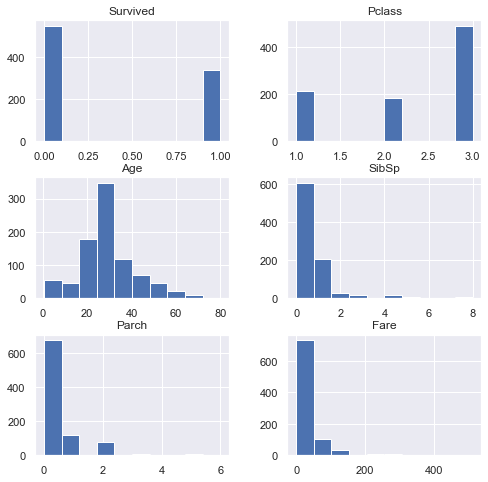

In [9]:
df_cleaned=pd.read_csv(r'titanic_data_cleaned.csv')
df_cleaned.hist(figsize=(8,8));

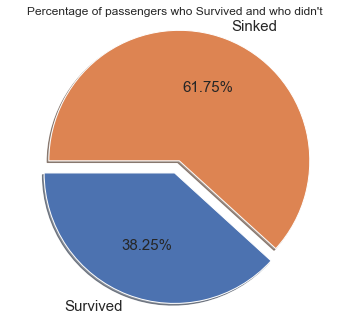

In [10]:
label_Names = ["Survived", "Sinked"]
data = [df_cleaned.query('Survived == 1').count()[0], df_cleaned.query('Survived == 0').count()[0]]
explode = (0, 0.15)
plt.axis('equal'); 
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("Percentage of passengers who Survived and who didn't",y=1.2);

### Research Question 1 (I Is there any Correlation between features and Survived?)

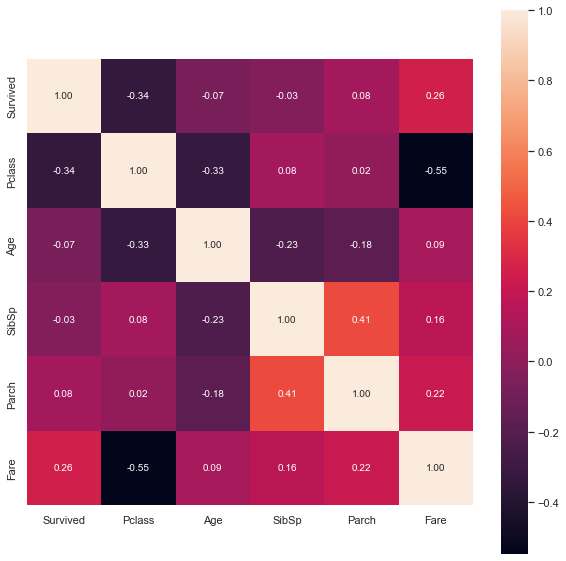

In [11]:
correlation = df_cleaned.corr()
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});

- There is no strong correlation between any feature with Survived

### Research Question 2 (Are gender ,Pclass , and Embarked affect the passenger's Survived?)

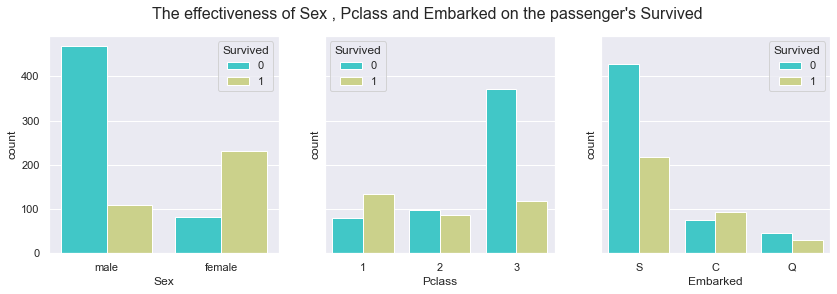

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.countplot(x='Sex', data=df_cleaned, hue='Survived', ax=ax1, palette='rainbow')
sns.countplot(x='Pclass', data=df_cleaned, hue='Survived', ax=ax2, palette='rainbow')
sns.countplot(x='Embarked', data=df_cleaned, hue='Survived', ax=ax3, palette='rainbow')
fig.set_figwidth(14)
fig.set_figheight(4)
fig.suptitle("The effectiveness of Sex , Pclass and Embarked on the passenger's Survived", fontsize=16);

- from bar chart of gender we found female's survived percentage more than males

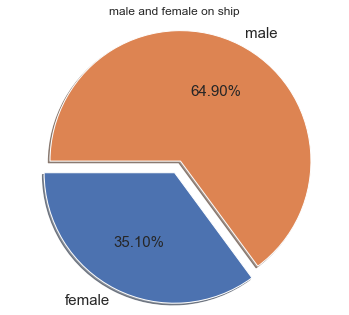

In [13]:
label_Names = ["female", "male"]
data = [df_cleaned.query('Sex == "female"').count()[0], df_cleaned.query('Sex == "male"').count()[0]]
explode = (0, 0.15)
plt.axis('equal'); 
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("male and female on ship",y=1.2);

In [14]:
female_ratio=df_cleaned.query('Survived==1 and Sex == "female"').count()[0]/df_cleaned.query('Sex == "female"').count()[0]
male_ratio=df_cleaned.query('Survived==1 and Sex == "male"').count()[0]/df_cleaned.query('Sex == "male"').count()[0]
female_ratio,male_ratio

(0.7403846153846154, 0.18890814558058924)

- The percentage of women who survived 74 % of all females greater than men whose survived percentage 18%

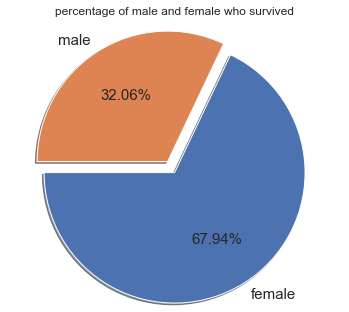

In [15]:
label_Names = ["female", "male"]
data = [df_cleaned.query('Sex == "female" and Survived==1').count()[0], df_cleaned.query('Sex == "male" and Survived==1').count()[0]]
explode = (0, 0.15)
plt.axis('equal'); 
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("percentage of male and female who survived",y=1.2);

- Sex affect who Survived from titanic , and as we see 68% of survived were women.
- third class have the highest no of passengers and lowest survived ratio , where first class passengers surviving percentage the highest.
- passengers who embarked from port c have surviving percentage.
- female , first class and port c the most likely passengers to be survived.

### Research Question 3 (Is Number of siblings and spouses of the passenger aboard affect the passenger's Survived?)

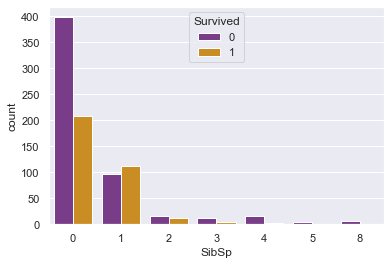

In [16]:
sns.countplot(x='SibSp', data=df_cleaned, hue='Survived',  palette='CMRmap')
fig.set_figwidth(14)
fig.set_figheight(4)


- Passenger with one sibling or one spouse has the highest survive percentage from who hasn't or has more than one.

### Research Question 4 (Is  Number of parents and children of the passenger aboard affect the passenger's Survived?)

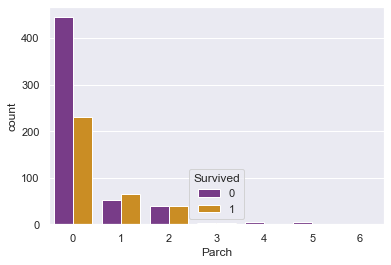

In [17]:
sns.countplot(x='Parch', data=df_cleaned, hue='Survived',  palette='CMRmap')
fig.set_figwidth(14)
fig.set_figheight(4)

- Passenger with one or two parent or childern has the highest survive percentage from who hasn't or has more than two.

### Research Question 5 (Is Fare affect the passenger's Survived?)

In [18]:
df_fare=df_cleaned.copy()
bins=[df_cleaned.describe()['Fare']['min'],df_cleaned.describe()['Fare']['25%'],df_cleaned.describe()['Fare']['50%'],df_cleaned.describe()['Fare']['75%'],
     df_cleaned.describe()['Fare']['max']]
bins_labels=['0-7','7-14','14-31','mor than 31']
df_fare['fare_level']=pd.cut(df_fare['Fare'],bins,labels=bins_labels)

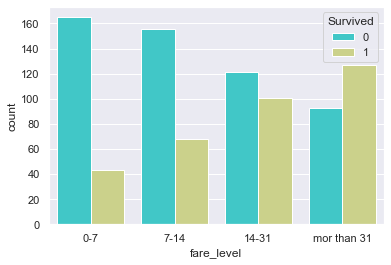

In [19]:
sns.countplot(x='fare_level', data=df_fare, hue='Survived', palette='rainbow')
fig.set_figwidth(15)
fig.set_figheight(5)

- Fare paid by the passenger affected the survival percentage , as we can see passengers who paid more than 31 has the highest chance for surviving.

### Research Question 6 (Is the average of age of passenger's Survived?)

In [20]:
df_age=df_cleaned.copy()
bins=[df_cleaned.describe()['Age']['min'],df_cleaned.describe()['Age']['25%'],df_cleaned.describe()['Age']['50%'],df_cleaned.describe()['Age']['75%'],
     df_cleaned.describe()['Age']['max']]
bins_labels=['childs','young-adults','middel-age-adults','old-adults']
df_age['age_level']=pd.cut(df_age['Age'],bins,labels=bins_labels)

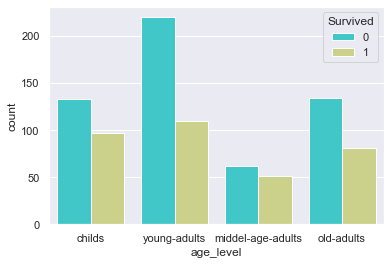

In [21]:
sns.countplot(x='age_level', data=df_age, hue='Survived', palette='rainbow')
fig.set_figwidth(15)
fig.set_figheight(5)

- here we can see normal order for the rescue 
    - child's 
    - old adults 
    - middle-aged-adults 
    - young adults

<a id='conclusions'></a>
## Conclusions

### Conclusions Results:
- 38.25% of passengers were Survived,where 67.94% of them were females and 32.04% were males.
- Being female , ride in first class or Embark from port c you were most likely passengers to be survived.
- There is no strong correlation between any feature with survived.
- Passenger with one sibling or one spouse has the highest survive percentage from who hasn't or has more than one.
- Passenger with one or two parent or childern has the highest survive percentage from who hasn't or has more than two.
- Fare paid by the passenger affected the survival percentage , as we can see passengers who paid more than 31 has the highest chance for surviving.

<a id='pred'></a>
## Titanic Survival Exploration with Decision Trees

In [22]:
df=pd.read_csv(r'titanic_data_cleaned.csv')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [23]:
y=df['Survived']
df.drop(columns={"Survived"},inplace=True)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [24]:
# One-hot encoding
features = pd.get_dummies(df)
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


## (TODO) Training the model

Now we're ready to train a model in sklearn. First, let's split the data into training and testing sets. Then we'll train the model on the training set.

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(features,y,test_size=0.2, random_state=42)

In [26]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

## Testing the model
Now, let's see how our model does, let's calculate the accuracy over both the training and the testing set.

In [27]:
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)

In [28]:
train_accuracy=accuracy_score(Y_train,y_train_predict)
test_accuracy=accuracy_score(Y_test,y_test_predict)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.9859353023909986
The test accuracy is 0.7415730337078652


# Improving the model

Ok, high training accuracy and a lower testing accuracy. We may be overfitting a bit.

 Train a new model, and we try to specify some parameters in order to improve the testing accuracy, such as:
- `max_depth`
- `min_samples_leaf`
- `min_samples_split`



**Challenge:** Try to get to 80% accuracy on the testing set.

In [29]:
# Training the model
model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=10)
model.fit(X_train, Y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating accuracies
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.8635724331926864
The test accuracy is 0.8202247191011236
